In [1]:
import pandas as pd 
import glob, os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_path = '../data/'

# Load the files

In [3]:
file_lst = []
for file in glob.glob(f"{dir_path}*yellow*.csv"):
    file_lst.append(file)

In [4]:
file_lst

['../data/yellow_tripdata_2020-07.csv',
 '../data/yellow_tripdata_2020-04.csv',
 '../data/yellow_tripdata_2020-09.csv',
 '../data/yellow_tripdata_2020-03.csv',
 '../data/yellow_tripdata_2020-08.csv',
 '../data/yellow_tripdata_2020-05.csv',
 '../data/yellow_tripdata_2020-06.csv']

# Load the data into a single DataFrame

In [5]:
df_lst = []
for file in file_lst:
    df_lst.append(pd.read_csv(file, low_memory=False, parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime']))
    
data = pd.concat(df_lst)

# Data Set Overview and Sanity Check

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7292124 entries, 0 to 549759
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
dtypes: datetime64[ns](2), f

In [7]:
data.describe(percentiles=[.9,.95,.99]).T

,count,mean,std,min,50%,90%,95%,99%,max
VendorID,6901249.0,1.651197,0.476592,1.00,2.00,2.00,2.00,2.00,2.00
passenger_count,6901249.0,1.421281,1.076004,0.00,1.00,2.00,4.00,6.00,9.00
trip_distance,7292124.0,3.989182,365.520422,0.00,1.71,6.90,10.80,19.20,297004.51
RatecodeID,6901249.0,1.044269,0.805033,1.00,1.00,1.00,1.00,2.00,99.00
PULocationID,7292124.0,161.567295,67.992281,1.00,161.00,239.00,262.00,263.00,265.00
DOLocationID,7292124.0,158.181106,72.201732,1.00,161.00,239.00,261.00,263.00,265.00
payment_type,6901249.0,1.311160,0.503481,1.00,1.00,2.00,2.00,3.00,5.00
fare_amount,7292124.0,12.924575,303.348997,-1259.00,9.00,25.50,36.59,56.50,671100.14
extra,7292124.0,1.088222,185.162254,-26.50,0.50,3.00,3.50,3.50,500000.80
mta_tax,7292124.0,0.560576,185.158233,-0.50,0.50,0.50,0.50,0.50,500000.50


# Flag #1

Seems like we are dealing with some outliers, judging by the distributions: 
* total_amount - has a quite unrealistic peak value of `1_000_003.80` and we can see that the 99% of the trips cost less than `73.67` USD
* trip distance - has a peak value of `297_004` miles, which seams like an error to me, given that 99% of trips are below 20 miles. 

The similar patern can be observed for: 
* tolls_amount 
* extra (part of total amount)
* mta_tax (part of total amount)
* fare amount (part of total amount)

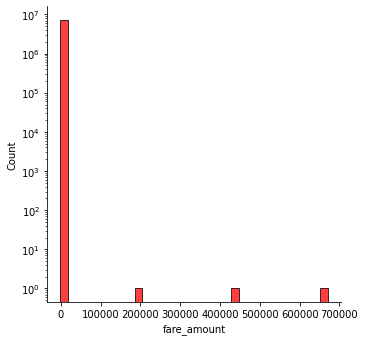

In [8]:
sns.displot(data, x='fare_amount', kind='hist', 
             bins=int(180/5), color = 'red',)
plt.yscale('log')

In [9]:
filtered_data = data[data['fare_amount'] < 10000]

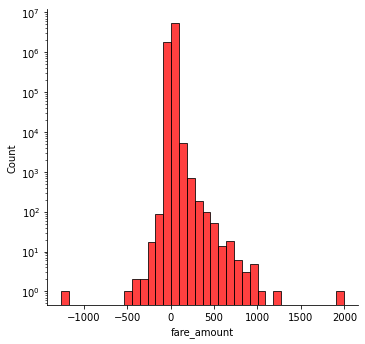

In [10]:
sns.displot(filtered_data, x='fare_amount', kind='hist', 
             bins=int(180/5), color = 'red',)
plt.yscale('log')

In [11]:
filtered_data = data[data['fare_amount'] < 1000]

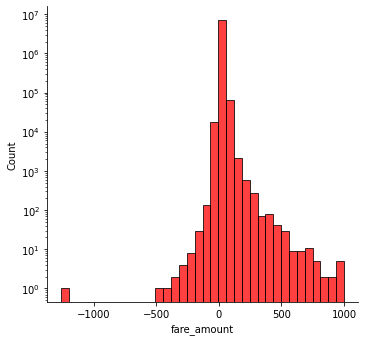

In [12]:
sns.displot(filtered_data, x='fare_amount', kind='hist', 
             bins=int(180/5), color = 'red',)
plt.yscale('log')

# Flag #2

There are also many trips with `trip_distance=0`. I guess those were canceled or there were some errors involved.

In [13]:
data[data['trip_distance'] == 0].shape[0] 

140916

In [14]:
# data[data['trip_distance'] == 0]['fare_amount'].describe()

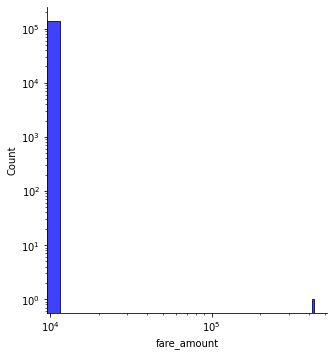

In [15]:
sns.displot(data[data['trip_distance'] == 0], x='fare_amount', kind='hist', 
             bins=int(180/5), color = 'blue')
plt.yscale('log')
plt.xscale('log')


There is one crazy outlier here, I will drop it for the sake of a better plot.

In [16]:
filtered_data = data[(data['trip_distance'] == 0) & (data['fare_amount'] < 10000)]

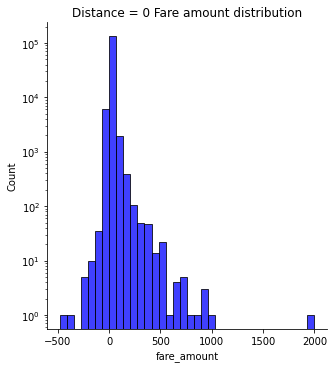

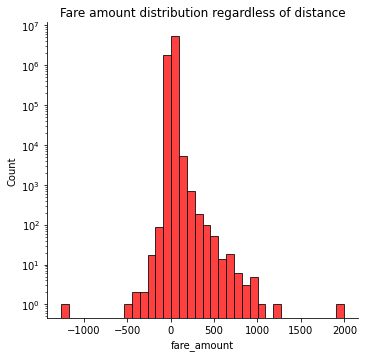

In [17]:
sns.displot(filtered_data, x='fare_amount', kind='hist', 
             bins=int(180/5), color = 'blue')
plt.yscale('log')
plt.title('Distance = 0 Fare amount distribution')
sns.displot(data[data['fare_amount'] < 10000], x='fare_amount', kind='hist', 
             bins=int(180/5), color = 'red',)
plt.title('Fare amount distribution regardless of distance')
plt.yscale('log')

There fare amount distribution doesn't change dramaticaly (there is no pattern like a flat cancelation fee), which leads me to beleive that trips with `distance=0` are also outliers. 

# Timestamp Sanity check

# Flag #3

In [18]:
data['year'] = data.tpep_pickup_datetime.dt.year

In [19]:
data['year'].value_counts()

2020    7292088
2009         26
2008         10
Name: year, dtype: int64

### Apparently we have some records from years other than 2020

doesn't hurt to also check if there are records from unexpected months

In [20]:
data['month'] = data.tpep_pickup_datetime.dt.month

In [21]:
data['month'].value_counts()

3     3006908
9     1340882
8     1007282
7      800422
6      549777
5      348357
4      237877
2         392
10        119
1          95
12         10
11          3
Name: month, dtype: int64

### Apparently we have some records for some unexpected months (we expect months 3-9)

# Cleanup

### Time related cleaning

Keeping data for months [march, ... ,september]

In [22]:
data.shape[0]

7292124

In [23]:
data = data[data['month'].isin(range(3,10))]
data.shape[0]

7291505

In [24]:
data.month.value_counts()

3    3006908
9    1340882
8    1007282
7     800422
6     549777
5     348357
4     237877
Name: month, dtype: int64

In [25]:
data.year.value_counts()

2020    7291505
Name: year, dtype: int64

This also filtered out events that were not in 2020

### 2) Trip distance cleaning

In [26]:
data = data[(data['trip_distance'] > 0) & ((data['trip_distance'] < 100))]
data.shape[0]

7150393

I kept the trips below 100 eventhough the value coresponding to the 99th percentile is 20 miles. Just because sometimes the destination can be outside the city, or the ride can contain multiple stops, etc. 

# 3) Fare amount cleaning

In [27]:
data = data[data['fare_amount'] < 1000]
data.shape[0]

7150390

# This looks a bit more realistic now

In [28]:
data.describe(percentiles=[.9,.95,.99]).T

,count,mean,std,min,50%,90%,95%,99%,max
VendorID,6767218.0,1.658282,0.474285,1.00,2.00,2.00,2.00,2.00,2.00
passenger_count,6767218.0,1.426665,1.081235,0.00,1.00,2.00,4.00,6.00,9.00
trip_distance,7150390.0,3.062553,3.820108,0.01,1.77,7.00,10.90,19.23,99.87
RatecodeID,6767218.0,1.029296,0.475196,1.00,1.00,1.00,1.00,2.00,99.00
PULocationID,7150390.0,161.840127,67.835524,1.00,161.00,239.00,262.00,263.00,265.00
DOLocationID,7150390.0,158.316371,72.058863,1.00,161.00,239.00,261.00,263.00,265.00
payment_type,6767218.0,1.309553,0.499047,1.00,1.00,2.00,2.00,3.00,5.00
fare_amount,7150390.0,12.571660,11.537901,-1259.00,9.00,24.50,35.95,55.50,950.00
extra,7150390.0,1.032155,1.236775,-26.50,0.50,3.00,3.50,3.50,90.06
mta_tax,7150390.0,0.493441,0.072631,-0.50,0.50,0.50,0.50,0.50,30.80


# Save the data

In [29]:
data.to_pickle(f'{dir_path}/full_cleaned_trip_data.pkl')